In [1]:
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
left_eye_train = np.load('./eye_tracker_train_and_val/train_eye_left.npy')
right_eye_train = np.load('./eye_tracker_train_and_val/train_eye_right.npy')
train_face = np.load('./eye_tracker_train_and_val/train_face.npy')
train_face_mask = np.load('./eye_tracker_train_and_val/train_face_mask.npy')
train_y = np.load('./eye_tracker_train_and_val/train_y.npy')
val_eye_left = np.load('./eye_tracker_train_and_val/val_eye_left.npy')
val_eye_right = np.load('./eye_tracker_train_and_val/val_eye_right.npy')
val_face = np.load('./eye_tracker_train_and_val/val_face.npy')
val_face_mask = np.load('./eye_tracker_train_and_val/val_face_mask.npy')
val_y = np.load('./eye_tracker_train_and_val/val_y.npy')

In [12]:
print left_eye_train.shape
print right_eye_train.shape
print train_face.shape
print train_face_mask.shape
print train_y.shape
print val_eye_left.shape
print val_eye_right.shape
print val_face.shape
print val_face_mask.shape
print val_y.shape

(48000, 64, 64, 3)
(48000, 64, 64, 3)
(48000, 64, 64, 3)
(48000, 25, 25)
(48000, 2)
(5000, 64, 64, 3)
(5000, 64, 64, 3)
(5000, 64, 64, 3)
(5000, 25, 25)
(5000, 2)


In [4]:
img_size = 64
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)

In [5]:
def plot_images(images):
    fig, axes = plt.subplots(1,4)
    fig.subplots_adjust(hspace=0.6, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='binary')
    plt.show()
        

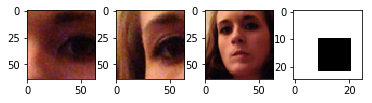

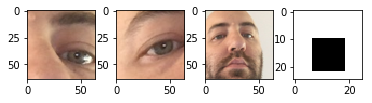

In [6]:
images = [left_eye_train[0], right_eye_train[0], train_face[0], train_face_mask[0]]
images1 = [left_eye_train[1], right_eye_train[1], train_face[1], train_face_mask[1]]
plot_images(images)
plot_images(images1)

In [7]:
num_channel = 3
mask_size = 25 #Grid sie mentioned in the paper
learning_rate = 1e-3

In [15]:
def normalize(data):
    shape = data.shape
    data = np.reshape(data, (shape[0], -1))
    data = data.astype('float32') / 255. # scaling
    data = data - np.mean(data, axis=0) # normalizing
    return np.reshape(data, shape)

In [17]:
left_eye = normalize(left_eye_train[0:10]) #Do not just call normalize with whole Dataset, you ill get Memory error
print left_eye.shape

(10, 64, 64, 3)


In [18]:
def prepare(data):
    left_eye, right_eye, face, face_grid, y = data
    left_eye = normalize(left_eye)
    right_eye = normalize(right_eye)
    face = normalize(face)
    face_grid = normalize(face_grid)
    y = normalize(y)
    
    return [left_eye, right_eye, face, face_grid, y]

In [19]:
#initialize placeholders
eye_left = tf.placeholder(tf.float32, [None, img_size, img_size, num_channel])
eye_right = tf.placeholder(tf.float32, [None, img_size, img_size, num_channel])
face = tf.placeholder(tf.float32, [None, img_size, img_size, num_channel])
face_mask = tf.placeholder(tf.float32, [None, mask_size, mask_size])

In [20]:
print eye_left.shape
print eye_right.shape

(?, 64, 64, 3)
(?, 64, 64, 3)


In [21]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [22]:
def maxpool2d(x, k, strides):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, strides, strides, 1], padding='VALID')

In [ ]:
[]define weights and bias
[]create batch
[]build model
[]validate